In [1]:
import os
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import Image

%matplotlib inline

In [2]:
def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assests....", end="")

    # Downloading zip file using urllib package.
    urlretrieve(url, save_path)

    try:
        # Extracting zip file using the zipfile package.
        with ZipFile(save_path) as z:
            # Extract ZIP file contents in the same directory.
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)


In [3]:
URL = r"https://www.dropbox.com/s/rys6f1vprily2bg/opencv_bootcamp_assets_NB2.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd() + "/assets", f"opencv_bootcamp_assets_NB2.zip")

# Download if assest ZIP does not exists. 
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path) 

Text(0.5, 1.0, 'Original image')

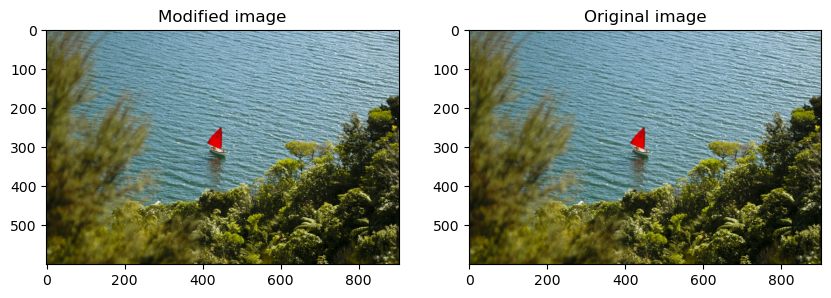

In [4]:
img = cv.imread("assets/New_Zealand_Boat.jpg", cv.IMREAD_COLOR_RGB)
imgcpy = img.copy()
imgcpy[2:4,2:4] = 200

plt.figure(figsize=[10,10])
plt.subplot(1,2,1)
plt.imshow(imgcpy, cmap='gray')
plt.title('Modified image')
plt.subplot(1,2,2)
plt.imshow(img, cmap='gray')
plt.title('Original image')

Text(0.5, 1.0, 'Cropped')

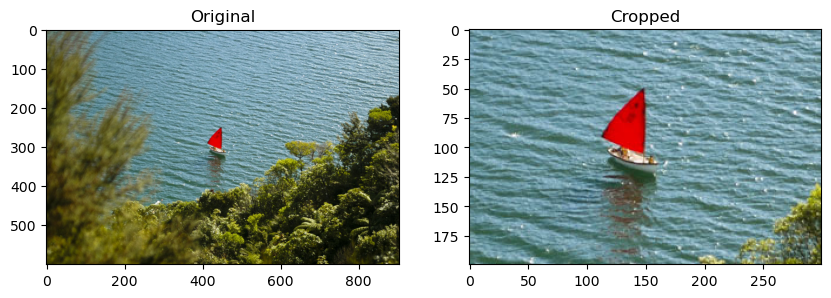

In [5]:
img = cv.imread("assets/New_Zealand_Boat.jpg", cv.IMREAD_COLOR_RGB)
imgcrop = img[200:400, 300:600]

plt.figure(figsize=[10,10])
plt.subplot(1,2,1)
plt.imshow(img)
plt.title('Original')
plt.subplot(1,2,2)
plt.imshow(imgcrop)
plt.title('Cropped')

Text(0.5, 1.0, 'Resized')

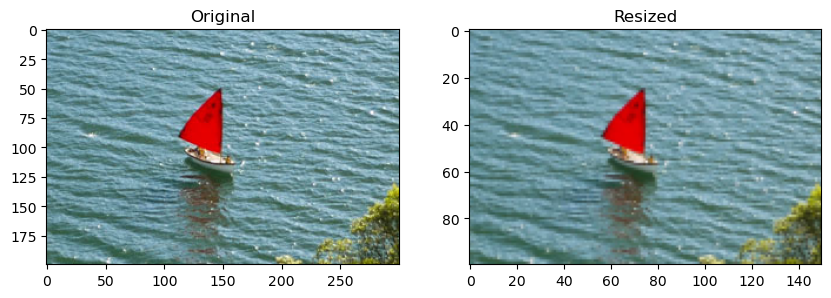

In [6]:
imgres = cv.resize(imgcrop, None, fx=.5, fy=.5)

plt.figure(figsize=[10,10])
plt.subplot(1,2,1)
plt.imshow(imgcrop)
plt.title('Original')
plt.subplot(1,2,2)
plt.imshow(imgres)
plt.title('Resized')

Text(0.5, 1.0, 'Resized')

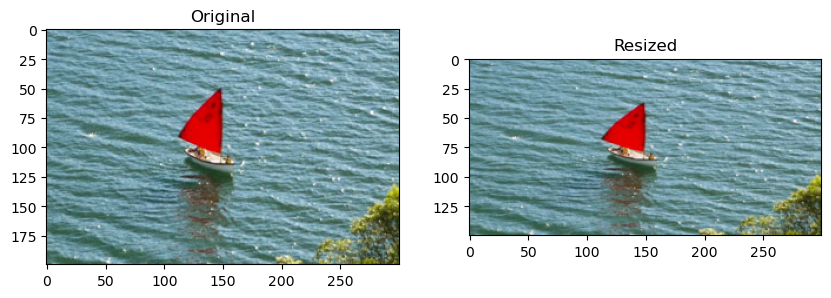

In [7]:
imgres = cv.resize(
    imgcrop,
    dsize=(300, 150),
    interpolation=cv.INTER_AREA,
)

plt.figure(figsize=[10,10])
plt.subplot(1,2,1)
plt.imshow(imgcrop)
plt.title('Original')
plt.subplot(1,2,2)
plt.imshow(imgres)
plt.title('Resized')

Text(0.5, 1.0, 'Resized')

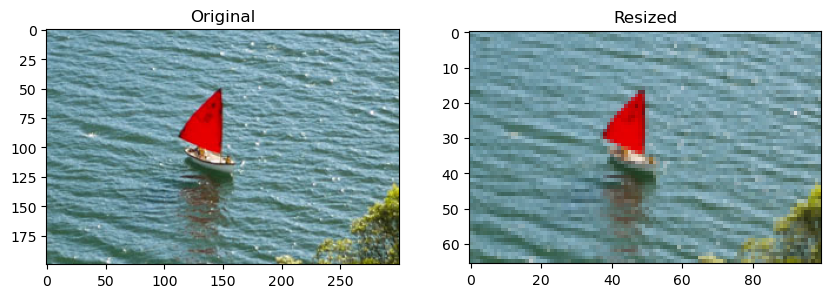

In [8]:
width = 100
# shape[1] = width
ratio = width / imgcrop.shape[1]
# shape[0] = height
height = int(imgcrop.shape[0] * ratio)

imgres = cv.resize(
    imgcrop,
    dsize=(width, height),
    interpolation=cv.INTER_AREA,
)

plt.figure(figsize=[10,10])
plt.subplot(1,2,1)
plt.imshow(imgcrop)
plt.title('Original')
plt.subplot(1,2,2)
plt.imshow(imgres)
plt.title('Resized')

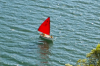

In [9]:
imgres_bgr = cv.cvtColor(imgres, cv.COLOR_RGB2BGR)
cv.imwrite("assets/resized_cropped_image_2x.png", imgres_bgr) 

Image(filename="assets/resized_cropped_image_2x.png")

Text(0.5, 1.0, 'Original')

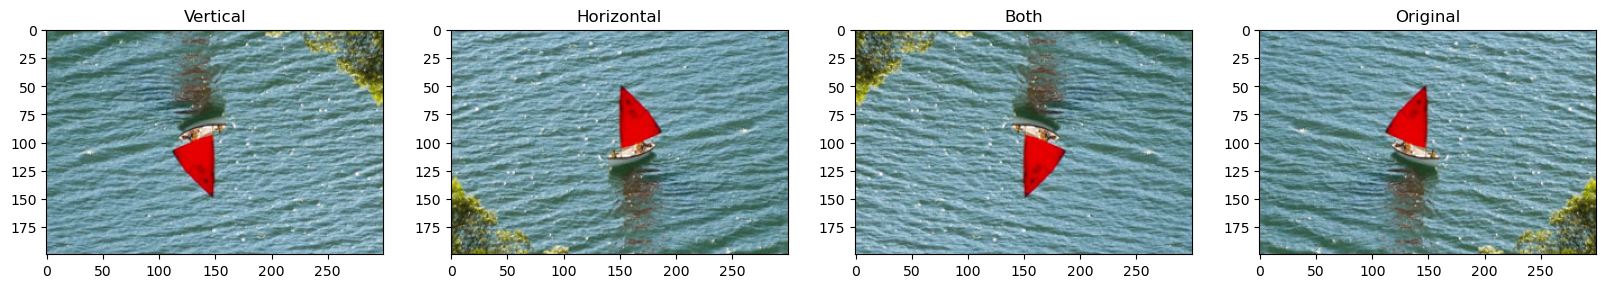

In [10]:
img_flip_x = cv.flip(imgcrop, 0)
img_flip_y = cv.flip(imgcrop, 1)
img_flip_xy = cv.flip(imgcrop, -1)

plt.figure(figsize=[20,5])
plt.subplot(1,4,1)
plt.imshow(img_flip_x)
plt.title('Vertical')
plt.subplot(1,4,2)
plt.imshow(img_flip_y)
plt.title('Horizontal')
plt.subplot(1,4,3)
plt.imshow(img_flip_xy)
plt.title('Both')
plt.subplot(1,4,4)
plt.imshow(imgcrop)
plt.title('Original')